Q) Perform and analyze different optimizers used in deep learning (NAG,RMSprop,Adam,Adagrad,Momentum_GD) on Rosenbrock Function

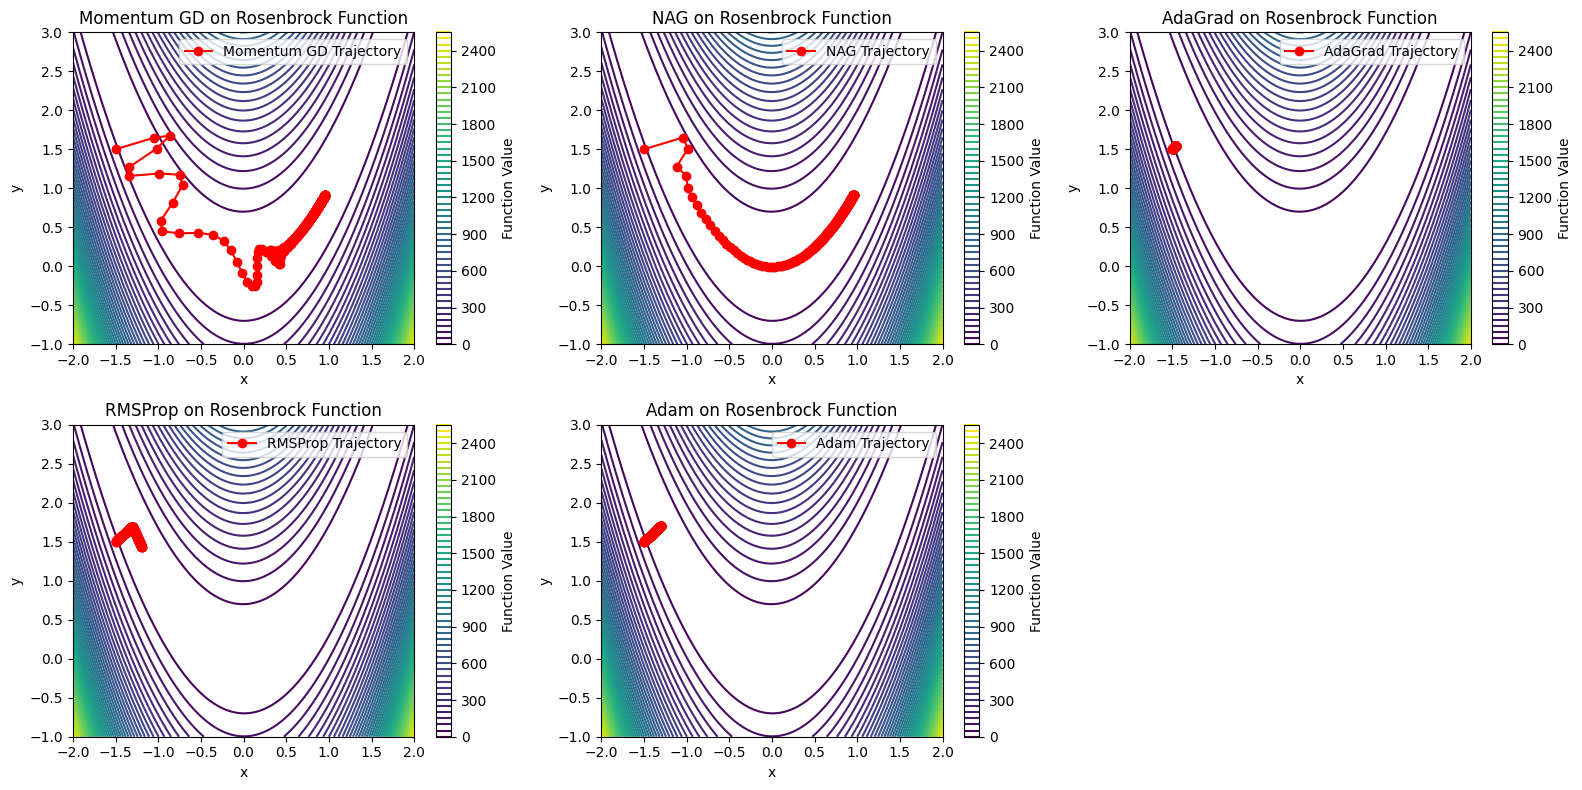

The Optimal Convergence Values for all the above Optimizers: 

Momentum GD: x = 0.956744, y = 0.915181, Z = 0.001874
NAG: x = 0.959047, y = 0.919604, Z = 0.001680
AdaGrad: x = -1.458768, y = 1.541420, Z = 40.453766
RMSProp: x = -1.195263, y = 1.436179, Z = 4.824844
Adam: x = -1.302881, y = 1.697323, Z = 5.303262


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the Rosenbrock function and its gradient
def rosenbrock(x, y):
    return (1 - x)**2 + 100 * (y - x**2)**2

def rosenbrock_gradient(x, y):
    df_dx = -2 * (1 - x) - 400 * x * (y - x**2)
    df_dy = 200 * (y - x**2)
    return np.array([df_dx, df_dy])

# Momentum-based Gradient Descent
def momentum_gd(grad_func, lr, beta, iters, start):
    x, y = start
    v_x, v_y = 0, 0
    trajectory = [(x, y)]
    for _ in range(iters):
        grad = grad_func(x, y)
        v_x = beta * v_x + lr * grad[0]
        v_y = beta * v_y + lr * grad[1]
        x -= v_x
        y -= v_y
        trajectory.append((x, y))
    return np.array(trajectory), rosenbrock(x, y)

# Nesterov Accelerated Gradient Descent
def nag(grad_func, lr, beta, iters, start):
    x, y = start
    v_x, v_y = 0, 0
    trajectory = [(x, y)]
    for _ in range(iters):
        lookahead_x = x - beta * v_x
        lookahead_y = y - beta * v_y
        grad = grad_func(lookahead_x, lookahead_y)
        v_x = beta * v_x + lr * grad[0]
        v_y = beta * v_y + lr * grad[1]
        x -= v_x
        y -= v_y
        trajectory.append((x, y))
    return np.array(trajectory), rosenbrock(x, y)

# AdaGrad
def adagrad(grad_func, lr, iters, start):
    x, y = start
    grad_sq_sum_x, grad_sq_sum_y = 0, 0
    trajectory = [(x, y)]
    for _ in range(iters):
        grad = grad_func(x, y)
        grad_sq_sum_x += grad[0]**2
        grad_sq_sum_y += grad[1]**2
        x -= (lr / (np.sqrt(grad_sq_sum_x) + 1e-8)) * grad[0]
        y -= (lr / (np.sqrt(grad_sq_sum_y) + 1e-8)) * grad[1]
        trajectory.append((x, y))
    return np.array(trajectory), rosenbrock(x, y)

# RMSProp
def rmsprop(grad_func, lr, beta, iters, start):
    x, y = start
    grad_sq_avg_x, grad_sq_avg_y = 0, 0
    trajectory = [(x, y)]
    for _ in range(iters):
        grad = grad_func(x, y)
        grad_sq_avg_x = beta * grad_sq_avg_x + (1 - beta) * grad[0]**2
        grad_sq_avg_y = beta * grad_sq_avg_y + (1 - beta) * grad[1]**2
        x -= (lr / (np.sqrt(grad_sq_avg_x) + 1e-8)) * grad[0]
        y -= (lr / (np.sqrt(grad_sq_avg_y) + 1e-8)) * grad[1]
        trajectory.append((x, y))
    return np.array(trajectory), rosenbrock(x, y)

# Adam
def adam(grad_func, lr, beta1, beta2, iters, start):
    x, y = start
    m_x, m_y = 0, 0
    v_x, v_y = 0, 0
    trajectory = [(x, y)]
    for t in range(1, iters + 1):
        grad = grad_func(x, y)
        m_x = beta1 * m_x + (1 - beta1) * grad[0]
        m_y = beta1 * m_y + (1 - beta1) * grad[1]
        v_x = beta2 * v_x + (1 - beta2) * grad[0]**2
        v_y = beta2 * v_y + (1 - beta2) * grad[1]**2
        m_x_hat = m_x / (1 - beta1**t)
        m_y_hat = m_y / (1 - beta1**t)
        v_x_hat = v_x / (1 - beta2**t)
        v_y_hat = v_y / (1 - beta2**t)
        x -= (lr / (np.sqrt(v_x_hat) + 1e-8)) * m_x_hat
        y -= (lr / (np.sqrt(v_y_hat) + 1e-8)) * m_y_hat
        trajectory.append((x, y))
    return np.array(trajectory), rosenbrock(x, y)

# Visualization
lr = 0.001
beta = 0.9
iters = 500
start = (-1.5, 1.5)

methods = {
    "Momentum GD": (momentum_gd, (rosenbrock_gradient, lr, beta, iters, start)),
    "NAG": (nag, (rosenbrock_gradient, lr, beta, iters, start)),
    "AdaGrad": (adagrad, (rosenbrock_gradient, lr, iters, start)),
    "RMSProp": (rmsprop, (rosenbrock_gradient, lr, beta, iters, start)),
    "Adam": (adam, (rosenbrock_gradient, lr, 0.9, 0.999, iters, start))
}

# Generate contour plot
x = np.linspace(-2, 2, 400)
y = np.linspace(-1, 3, 400)
X, Y = np.meshgrid(x, y)
Z = rosenbrock(X, Y)

optimal_values = {}
plt.figure(figsize=(16, 8))
for i, (method_name, (method_func, params)) in enumerate(methods.items(), 1):
    trajectory, z_value = method_func(*params)
    optimal_values[method_name] = (trajectory[-1, 0], trajectory[-1, 1], z_value)
    plt.subplot(2, 3, i)
    plt.contour(X, Y, Z, levels=50, cmap='viridis')
    plt.plot(trajectory[:, 0], trajectory[:, 1], 'r-o', label=f'{method_name} Trajectory')
    plt.title(f"{method_name} on Rosenbrock Function")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.colorbar(label="Function Value")

plt.tight_layout()
plt.show()

# Print optimal values
print("The Optimal Convergence Values for all the above Optimizers: \n")
for method, values in optimal_values.items():
    print(f"{method}: x = {values[0]:.6f}, y = {values[1]:.6f}, Z = {values[2]:.6f}")
